In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def prediction(theta_0, theta_1, x):
    return theta_0+theta_1*x

In [16]:
def prediction_difference(theta_0, theta_1, x,y):
    return prediction(theta_0, theta_1, x)-y

In [33]:
def gradient_descent(theta_0, theta_1, x, y,num_iterations, alpha):
    m=len(x)
    cost_list=[]   #경사하강할때마다 그 손실을 여기에 저장
    
    for i in range(num_iterations):
        error=prediction_difference(theta_0, theta_1, x, y)
        cost=(error@error)/(2*m)
        cost_list.append(cost)
        
        theta_0=theta_0-alpha*error.mean()
        theta_1=theta_1-alpha*(error*x).mean()
        
        if i % 10 == 0:  # 그래프를 모두 출력하면 너무 많으므로, 10번에 한번씩만 출력  
            plt.scatter(house_size, house_price)
            plt.plot(house_size, prediction(theta_0, theta_1, x), color='red')
            plt.show()
        
    return theta_0, theta_1, cost_list     

In [34]:
house_size=np.array([0.9,1.4,2,2.1,2.6,3.3,3.35,3.9,4.4,4.7,5.2,5.75,6.7,6.9])
house_price=np.array([0.3,0.75,0.45,1.1,1.45,0.9,1.8,0.9,1.5,2.2,1.75,2.3,2.49,2.6])

#theta 초기값 설정
th_0=2.5
th_1=0

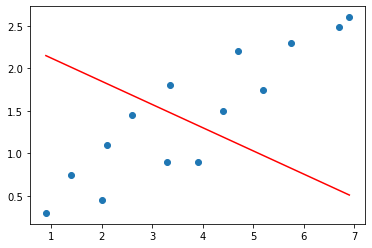

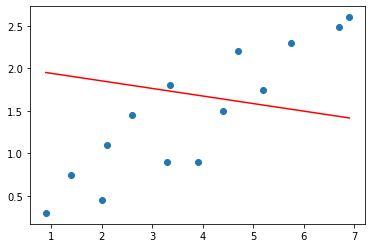

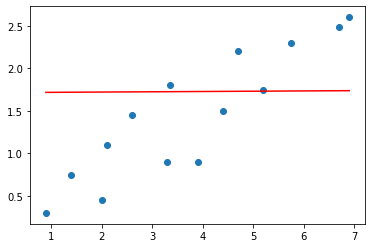

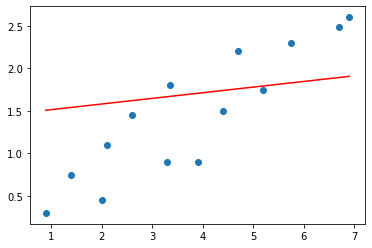

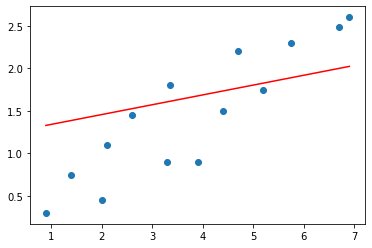

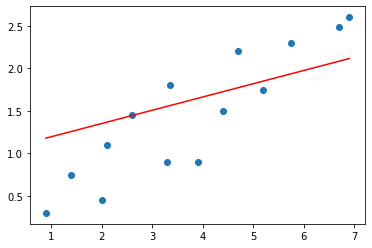

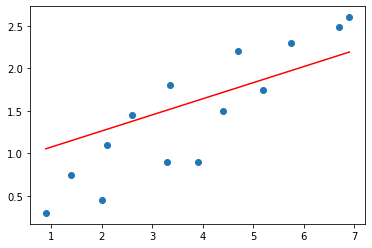

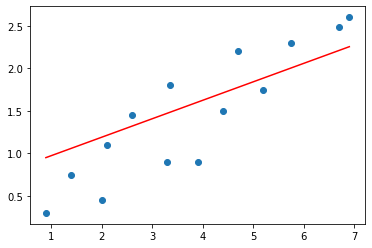

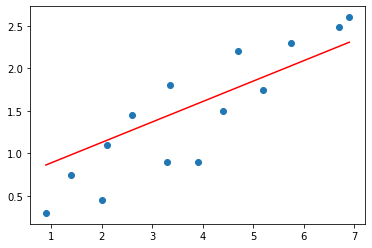

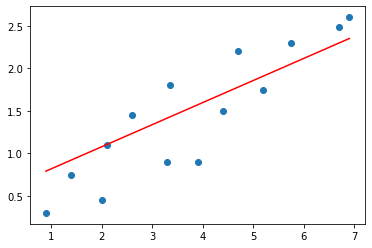

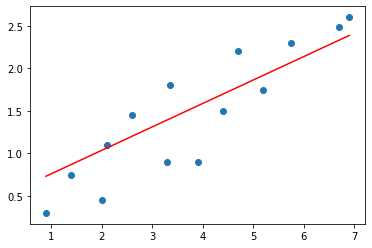

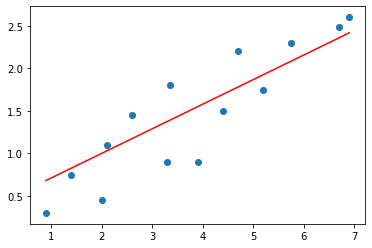

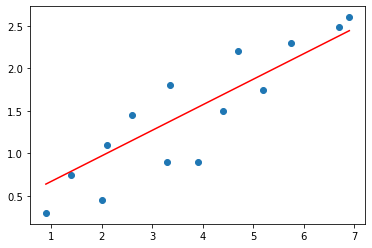

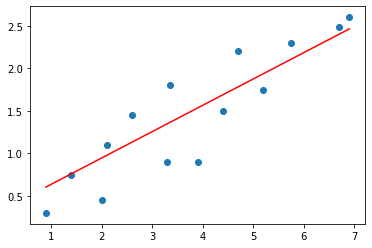

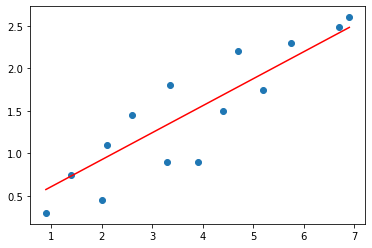

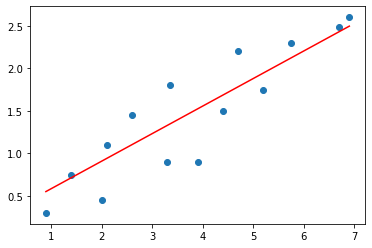

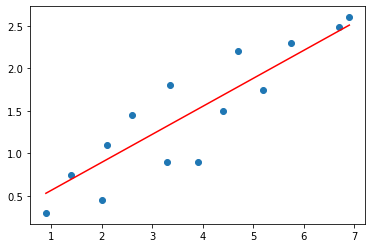

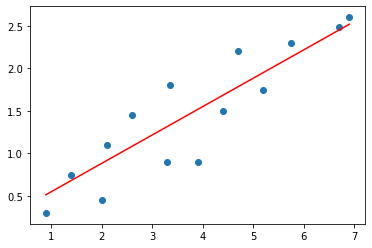

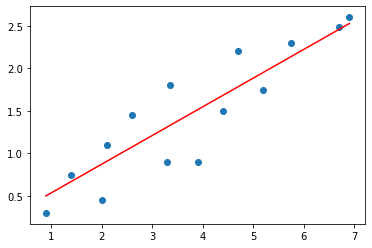

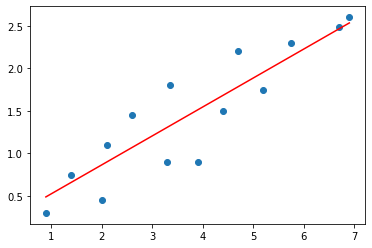

In [35]:
th_0, th_1, cost_list=gradient_descent(th_0, th_1,house_size, house_price, 200,0.1)

In [27]:
print(th_0, th_1)

0.16821801417752186 0.3438032402351199


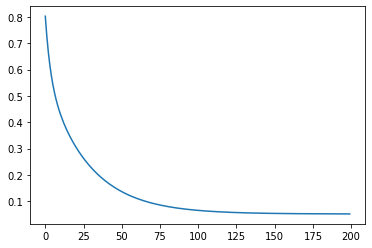

In [29]:
plt.plot(cost_list)   # 경사하강을 반복할수록 손실이 줄어들고 있음. 

# scikit-learn 

In [45]:
from sklearn.datasets import load_boston
import pandas as pd

In [38]:
boston_dataset=load_boston()

In [39]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [40]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [41]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [42]:
boston_dataset.data.shape

(506, 13)

In [43]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [44]:
boston_dataset.target.shape   # 차원이 506인 벡터

(506,)

In [47]:
x=pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [48]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [49]:
x=x[['AGE']]

In [51]:
y=pd.DataFrame(boston_dataset.target, columns=['MEDV'])

In [52]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9
